<a href="https://colab.research.google.com/github/aditudor30/Machine-Learning-Projects/blob/main/K_Means_Clustering_on_FIFA_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading our data set

In [2]:
data = pd.read_csv('/content/players_22.csv')

<ipython-input-2-35ee95ecb7da>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/players_22.csv')


In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


### Data Preprocessing
In this K-means Clustering project we are gonna use only the columns overall, potential, value_eur, wage_eur and age.

In [5]:
features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [7]:
# This line of code makes sure that we do not have missing data in the columns that we are working with
data = data.dropna(subset = features)

In [9]:
players = data[features].copy()
# This is gonna be the data that we will work with

In [10]:
players.head()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


 We will now scale our data so our model doesn't misinterpret values as more important because of the bigger value

In [12]:
# We are going to use the min-max method
players = ((players - players.min()) / (players.max()-players.min()))*9+1

In [13]:
players.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


We can see that in each column the minimum value is 1 and the maximum is 10 which is great because we should not have negative or null values

In [14]:
players.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


Next step in this clustering project is to assign our centroids randomly

In [17]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = players.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis = 1)

In [19]:
centroids = random_centroids(players, 5)

<ipython-input-17-c9944824e6a6>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = players.apply(lambda x: float(x.sample()))


In [20]:
centroids

,0,1,2,3,4
overall,6.869565,5.304348,4.130435,6.086957,6.282609
potential,6.282609,3.152174,5.500000,5.304348,5.695652
value_eur,1.097010,1.009325,1.120207,1.064534,1.055255
wage_eur,1.090129,1.000000,2.866953,1.090129,1.115880
age,8.333333,4.666667,3.000000,3.666667,3.333333


We are now going to calculate the distance between each data point that we have to each of our centroids and assign that data point to the nearest centroid


In [28]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((players-x) ** 2).sum(axis=1)))# Formula of the euclidean distance between two points applied to each of our centroids
  return distances.idxmin(axis=1) #this finds the minimum value and prints out the index where the minimum value is found

In [29]:
labels = get_labels(data, centroids)

In [31]:
labels.value_counts() # This shows us how many players are allocated to each of our centroids

,count
2,5248
1,4846
3,4370
4,3366
0,1335


We now have to update our centroids using geometric mean

In [34]:
def new_centroids(players, labels, k):
  return players.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
# We are splitting up data by our labels
# Then we are applying to each of these groups the geometric mean function
# After all of these operations we will get our updated centroids
# And to keep the centroids as the columns we transpose the matrix

In [35]:
from sklearn.decomposition import PCA #to visualize our data, as it is 5-dimensional
import matplotlib.pyplot as plt #for plotting
from IPython.display import clear_output #to clear our output

In [41]:
def plot_clusters(players, labels, centroids, iteration):
  pca = PCA(n_components = 2)
  data_2d = pca.fit_transform(players)
  centroids_2d = pca.transform(centroids.T) #this method expects our centroids to be the rows so we transpose the centroids matrix
  clear_output(wait = True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
  plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1])
  plt.show()

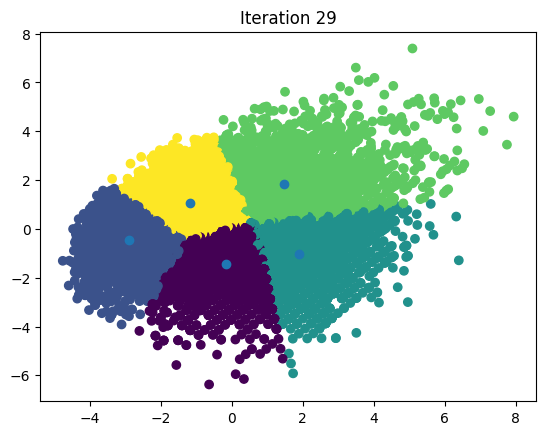

In [43]:
max_iterations = 100
k = 5

centroids = random_centroids(players, k)
old_centroids = pd.DataFrame()
# We will stop the algorithm when our old centroids are equal to our new centroids
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(players, centroids)
  centroids = new_centroids(players, labels, k)
  plot_clusters(players, labels, centroids, iteration)
  iteration += 1

It took 29 iterations for our algorithm to "converge" (that means our centroids do not change their position)
This doesn't mean that everytime it will take 29 iterations, it depends on the random values our centroids get at the start

### Interpreting the output

In [44]:
centroids

,0,1,2,3,4
overall,4.189459,2.500383,5.499958,6.417536,4.255796
potential,4.101927,4.371940,5.133623,6.790001,5.880758
value_eur,1.030153,1.013179,1.074418,1.445964,1.060266
wage_eur,1.053488,1.016086,1.217845,1.659848,1.068536
age,4.698993,2.338164,6.069287,3.923859,2.623854


We can see that cluster 3 shows the highest overall players and also the highest potential players

In [47]:
data[labels == 3][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
6345,E. Jirka,69,78,3100000.0,5000.0,23
6359,E. Lira,69,83,3400000.0,5000.0,21
6364,V. Lisakovich,69,77,3100000.0,20000.0,23
6376,M. Al-Tamari,69,75,2200000.0,7000.0,24


Cluster 4 shows young players with good potential

In [49]:
data[labels == 4][["short_name"] + features] # We can see that the age here is maximum 21

,short_name,overall,potential,value_eur,wage_eur,age
3568,Sebas Couteira,72,72,2800000.0,9000.0,21
3570,Gustavo Lobateiro,72,72,2800000.0,14000.0,21
3574,Teixe Gaúcho,72,72,2400000.0,8000.0,21
3581,Vanderleiton,72,72,2400000.0,12000.0,21
3586,Pimentiscinho,72,72,2500000.0,11000.0,21
...,...,...,...,...,...,...
18022,S. Jatta,55,76,400000.0,500.0,18
18071,Y. Djiga,55,77,375000.0,600.0,18
18125,J. Hernández,55,77,400000.0,500.0,17
18227,K. Urbański,54,79,350000.0,550.0,16


Cluster 2 displays the older players and their potential are the same as their overall

In [51]:
data[labels == 2][["short_name"] + features] # We can see that the minimum displayed age is 35

,short_name,overall,potential,value_eur,wage_eur,age
97,Z. Ibrahimović,84,84,14500000.0,51000.0,39
140,Fernandinho,83,83,7000000.0,100000.0,36
199,Pepe,82,82,5500000.0,14000.0,38
200,Raúl Albiol,82,82,8000000.0,30000.0,35
201,Ł. Fabiański,82,82,3400000.0,43000.0,36
...,...,...,...,...,...,...
14924,R. Costin,61,61,60000.0,1000.0,36
15171,D. Murphy,60,60,80000.0,500.0,38
16538,Wu Qing,58,58,70000.0,1000.0,39
17034,H. Shiota,57,57,20000.0,900.0,40


### Comparing our implementation to the scikit-learn K-Means algorithm


In [52]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(5)
kmeans.fit(players)

KMeans(n_clusters=5)

In [55]:
centroids = kmeans.cluster_centers_

In [56]:
pd.DataFrame(centroids, columns = features).T

,0,1,2,3,4
overall,4.924035,5.659819,2.977606,7.083472,4.221377
potential,6.096373,5.299047,4.845334,7.277252,4.062930
value_eur,1.095110,1.085808,1.019103,1.899774,1.027522
wage_eur,1.146940,1.267376,1.021186,2.271830,1.051385
age,3.124657,6.066197,2.445051,4.348485,4.995607


We can see the similar patterns:

Cluster 3 in both implementations show the best players

Cluster 2 in both implementations show the older players that hit their potential